<a href="https://colab.research.google.com/github/LiamThomassen/Human_Network_Analysis/blob/main/HNA_Challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train_scaled = np.divide(x_train,255)
x_test_scaled = np.divide(x_test,255)

y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(32, 32, 3), padding = "same"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
#Added layers
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.0001,
weight_decay=1e-6), metrics='accuracy')

In [ ]:
history4 = model.fit(x_train_scaled, y_train_cat, batch_size=32, epochs=20, verbose=1, validation_data=(x_test_scaled,y_test_cat), shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.8301 - accuracy: 0.3265 - val_loss: 1.6496 - val_accuracy: 0.3967
Epoch 2/20
1563/1563 [==============================] - 107s 69ms/step - loss: 1.6357 - accuracy: 0.4006 - val_loss: 1.5436 - val_accuracy: 0.4388
Epoch 3/20
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5122 - accuracy: 0.4478 - val_loss: 1.4050 - val_accuracy: 0.4888
Epoch 4/20
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4219 - accuracy: 0.4840 - val_loss: 1.3496 - val_accuracy: 0.5139
Epoch 5/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3579 - accuracy: 0.5116 - val_loss: 1.2797 - val_accuracy: 0.5388
Epoch 6/20
1563/1563 [==============================] - 113s 72ms/step - loss: 1.3052 - accuracy: 0.5355 - val_loss: 1.2262 - val_accuracy: 0.5586
Epoch 7/20
1563/1563 [==============================] - 109s 70ms/step - loss: 1.2630 - accuracy: 0.5505 - val_loss: 1

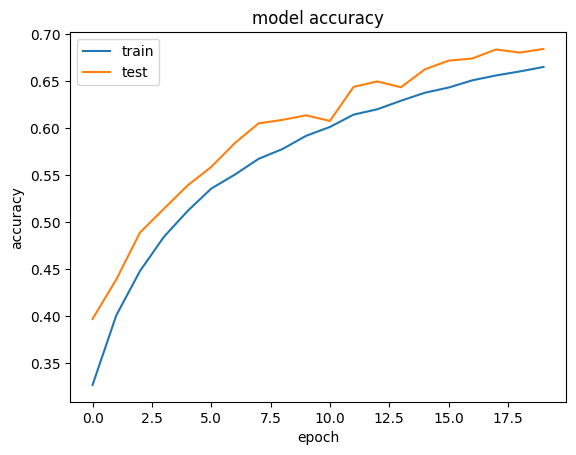

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

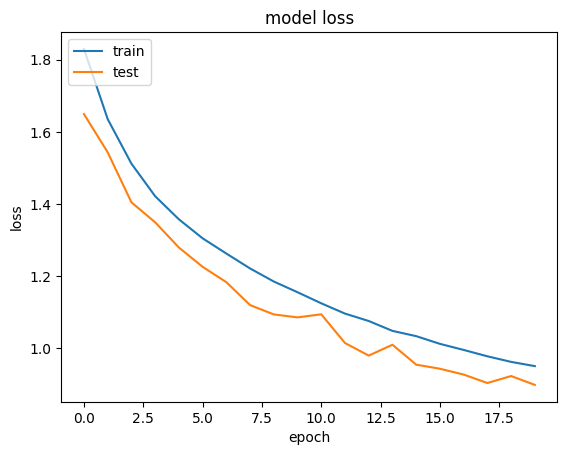

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()